# Homework 1

In this exercise you will learn how to use the `python` graph library `networkx` to represent and work with graphs. Most of this course focuses on the mathematical proofs of spectral graph theory, but a small part of it will focus on applying these techniques in practice to real graphs.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Types of Graphs

In `networkx` There are four basic graph types as Python classes, based on whether the graph is directed and simple.

`Graph`<br>
This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

`DiGraph`<br>
Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

`MultiGraph`<br>
A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

`MultiDiGraph`<br>
A directed version of a MultiGraph.

In this class we will use mostly `Graph`.

In [2]:
G = nx.Graph()

## Creating graphs

In `networkx` you can add nodes and edges one by one by using the `add_node` and `add_edge` methods. All nodes mush be `hashable` as defined by Python. If one or both endpoints of the edge are missing, they are automatically created. Every node and edge can have arbitrary attributes, that can be specified at creation or altered later.

In [3]:
G.add_node(1)
G.add_node(2, label=1)
G.add_edge(1,2)
G.add_edge(2, 3, weight=2)

#### Your turn!

Using the above methods, create $P_n$.

In [4]:
n = 10
P = nx.Graph()

# TODO: Fill out code here.
for node in range(n):
    P.add_node(node, label=node)

#Adding random edges to the graph
import random
edge_probability = 0.2
for node1 in P.nodes():
    for node2 in P.nodes():
        if node1 != node2 and random.random() < edge_probability:
            P.add_edge(node1, node2)

print(P)

Graph with 10 nodes and 13 edges


### Graphs from collections

Adding one node or edge at a time is costly. Instead, `networkx` provides ways to add a collection of nodes or edges.

In [5]:
nodes = np.arange(1, 4)
G.add_nodes_from(nodes)

elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)

elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

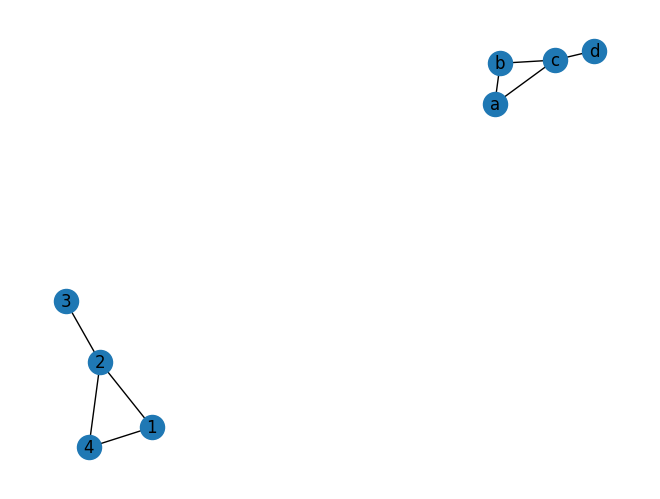

In [6]:
nx.draw(G, with_labels=True)

For a complete reference of all the ways and formats you can construct, read and write graphs you can visit the reference for the [reading and writing graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html#readwrite) subpackage.

#### Your turn!

Using the more advanced methods, create the $n \times m$ [torus grid](https://en.wikipedia.org/wiki/Toroidal_graph) where each node is connected to the four surrounding nodes, wrapping around in each direction.

In [6]:
def generate_torus(n, m):
    # TODO: Return T_{nm}, the n x m torus grid.
    #       Each edge should have a color attribute.
    #       Color the vertical edges red and the horizontal blue.
    
    
    # This will just be the graph stored as a matrix
    # for convenience
    M = []
    T = nx.Graph()

    #Adding Nodes
    for i in range(n):
        row = []
        for j in range(m):
            T.add_node(i * m + j, label= "{}".format(i * m + j))
            row.append(i * m + j)
        M.append(row)

    #Adding Edges
    for i in range(n):
        for j in range(m):
            adj_nodes = {}
            element = i * m + j
            if not T.has_edge(element, M[i-1][j]):
                adj_nodes[(element, M[i-1][j])] = 'red'

            if not T.has_edge(element, M[i][j-1]):
                adj_nodes[(element, M[i][j-1])] = 'blue'

            if i+1 >= n and not T.has_edge(element, M[0][j]): 
                    adj_nodes[(element, M[0][j])] = 'red' 

            if i+1 < n and not T.has_edge(element, M[i+1][j]):
                adj_nodes[(element, M[i+1][j])] = 'red'

            if j+1 >= m and not T.has_edge(element, M[i][0]):
                adj_nodes[(element, M[i][0])] = 'blue'

            if j+1 < m and not T.has_edge(element, M[i][j+1]):
                adj_nodes[(element, M[i][j+1])] = 'blue'

            for edge, color in adj_nodes.items():
                T.add_edge(edge[0], edge[1], edge_color=color)

    return T

T = generate_torus(10, 20)

## Graph Generators

Of course, an advanced graph library like `networkx` already has generators for these simple graphs. You can read more by visiting the reference for [graph generators](https://networkx.org/documentation/stable/reference/generators.html). We will load two real networks, Zachary's Karate Club graph and the co-appearance graph in the novel Les Miserable.

Zachary's Karate Club graph is a real social network assembled by anthropologist and computer scientist Wayne W. Zachary. The Karate Club includes 34 members and 78 connections. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split. The member that was misclassified had external reasons for following "Mr. Hi".

Les Miserable co-appearance graph has 77 nodes and 254 weighted edges, based on how many times two characters appear together.

In [8]:
karate = nx.karate_club_graph()
les_miserables = nx.les_miserables_graph()

## The Graph properties

The most important properties that `networkx` exposes are `G.nodes` and `G.edges`. These are internally stored views of dicts-of-dicts-of-dicts since most graphs are sparse. `G.adj` shows the actual 

In [9]:
print(f'The nodes of graph G are {G.nodes}')
print()
print(f'The edges of graph G are {G.edges}')
print()
print(f'The adjacency of node b in graph G is {G["b"]}')
print()
print(f'The full adjacency of graph G is')
for v in G.nodes:
    print(G[v])
print()
print(f'The weight of the edge {{2, 3}} is G[2][3][\'weight\'] = {G[2][3]["weight"]}')

The nodes of graph G are [1, 2, 3, 4, 'a', 'b', 'c', 'd']

The edges of graph G are [(1, 2), (1, 4), (2, 3), (2, 4), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]

The adjacency of node b in graph G is {'a': {'weight': 5.0}, 'c': {'weight': 3.0}}

The full adjacency of graph G is
{2: {}, 4: {}}
{1: {}, 3: {'weight': 2}, 4: {}}
{2: {'weight': 2}}
{1: {}, 2: {}}
{'b': {'weight': 5.0}, 'c': {'weight': 1.0}}
{'a': {'weight': 5.0}, 'c': {'weight': 3.0}}
{'b': {'weight': 3.0}, 'a': {'weight': 1.0}, 'd': {'weight': 7.3}}
{'c': {'weight': 7.3}}

The weight of the edge {2, 3} is G[2][3]['weight'] = 2


### Your turn!

Take your torus graph `T` from before and count the number of red and blue edges.

In [10]:
# TODO: Count the number of blue and red edges in the torus graph T
red = sum([0 if data['edge_color'] == 'blue' else 1 for u, v, data in T.edges(data=True)])
blue = sum([0 if data['edge_color'] == 'red' else 1 for u, v, data in T.edges(data=True)])

print(f'There are {red} red edges and {blue} blue edges.')

There are 200 red edges and 200 blue edges.


## Drawing Graphs

Most times it is helpful to draw a graph as it helps visualize it. The library offers a generic drawing method `nx.draw`, but also more specific methods for the nodes or edges in the [drawing](https://networkx.org/documentation/stable/reference/drawing.html#drawing) module

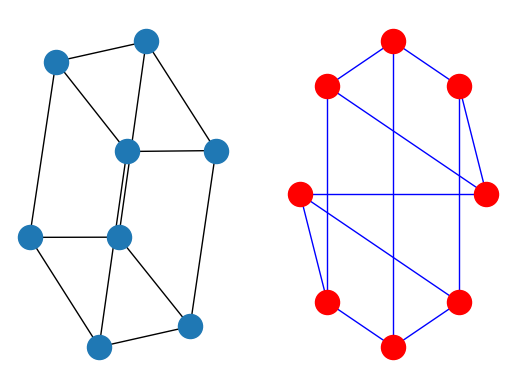

In [11]:
cube = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(cube)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(cube, pos=nx.circular_layout(cube), node_color='r', edge_color='b')

We can use the same methods to draw the `karate` and `les_miserable` networks.

### Your turn!

Draw the karate network. Requirements:
- Use the `spring_layout` for positions.
- Nodes that have the value `"Officer"` in the `club` property are colored `tab:blue`, the ones with value `"Mr. Hi"` are colored `tab:green`.
- Node names (0-33) should be displayed in white font.
- Edges between inside each community should have the same color as the community.
- Edges across communities should be `tab:red`.

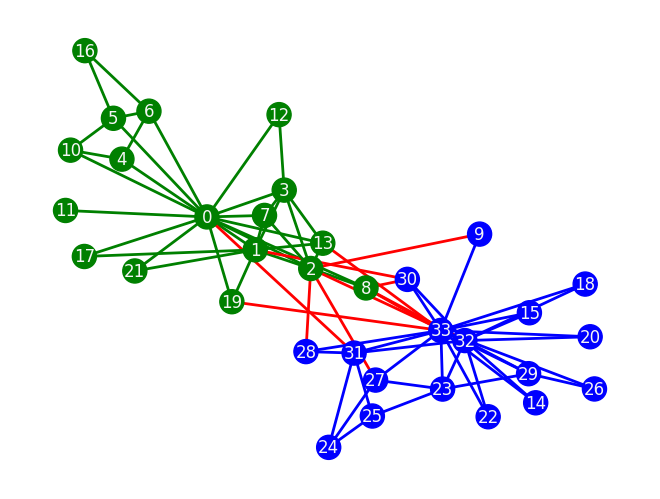

In [12]:
# TODO: Draw the karate graph as described above.
for node1 in karate.nodes():
    for node2 in karate.nodes():
        if karate.has_edge(node1, node2):
            club1 = karate.nodes[node1]['club']
            club2 = karate.nodes[node2]['club']
            
            if club1 == club2:    
                #Are in the same club, check which
                
                if club1 == 'Mr. Hi':
                    karate[node1][node2]['color'] = 'green'
                else:
                    #nx.edge_attr(karate, 'color', node1, node2, 'blue')
                    karate[node1][node2]['color'] = 'blue'
            
            else:
                #Not in same club, color red
                
                karate[node1][node2]['color'] = 'red'
                
#Getting color map for nodes
color_map = ['blue' if data['club'] == 'Officer' else 'green' for u, data in karate.nodes(data=True)]
#Extracting edge color
edge_colors = [karate[u][v]['color'] for u, v in karate.edges()]

pos = nx.spring_layout(karate)
pc = nx.draw(karate, pos=pos, node_color=color_map, with_labels=True, font_color="whitesmoke", edge_color=edge_colors, width=2)

# Heat Equation and Spectral Embedding

In class we saw how following the dynamics of the Heat Equation will yield the vector $\mathbf{v} = \arg \min_{\mathbf{x} \perp 1} \frac{\mathbf{x}^T \mathbf{L}_G \mathbf{x}}{\mathbf{x}^T \mathbf{D}_G \mathbf{x}}$.

In this section you will implement the dynamic $\mathbf{x}_{t + 1} = \mathbf{x}_t - \frac{1}{2}\mathbf{D}_G^{-1} \mathbf{L}_G \mathbf{x}_t$ to approximate the second eigenvalue. Your goal is to approximate the second eigenvector by following this evolution.

### Heat Evolution

Complete the following function which takes in a graph $G$, an initial $\mathbf{x}_0 \in \mathbb{R}^{n \times d}$ and a target bound $\epsilon$ for the Dirichlet energy $\mathcal{U}(\mathbf{x}) = \|\mathbf{x} - \bar{x} \mathbf{1}\|_{\mathbf{D}_G}$ and returns the iterates $\mathbf{X} \in \mathbb{R}^{T \times n \times d}$.

In [4]:
from typing import Tuple

def Dirichlet_energy(x: np.array, xbar: float, deg_mat: np.ndarray) -> float:
    """
    Calculates the Dirichlet energy for a given state x and average xbar. 
    Also needs the Degree matrix from graph G
    
    Parameters
    ----------
        x: np.array
           The state vector.
        xbar: float
           The float value to which the system will converge.
        deg_mat: np.ndarray
            The degree matrix of the graph
    
    Returns
    -------
        Dirichlet : float
            The ``Energy" of the system. I.e. how har we are from uniform distribution
    """
    
    #Construct xbar_vec as column vector with size of the state vector
    xbar_vec = xbar * np.ones((1,len(x)))

    #check if state vector is a row vector
    if x.shape != xbar_vec.shape:
        x= x.T
        
    #Difference the state vector is from average element wise
    state_difference = (x - xbar_vec)[0]
    
    
    Dirichlet = np.dot(state_difference, np.matmul(deg_mat, state_difference.T))
    Dirichlet *= 0.5
    
    return float(Dirichlet)

def calculate_xbars(G: nx.Graph, x_0: np.ndarray) -> np.array:
    """
    Calculates the average state for all initial conditions.
    
    Parameters
    ----------
    G: nx.Graph
        The Graph. Will calcualte the volume and degree matrix from it
    x_0 : np.array
        The array of initial conditions
    """
    deg_mat =  np.diag(np.array([node[1] for node in list(G.degree())]))
    vol = nx.volume(G, G.nodes())
    
    if x_0.ndim > 1:
        xbars = np.zeros((1, x_0.shape[1]))
    else:
        xbars = np.zeros((1, 1))

    #Check to see if x_0's a row vector
    if max(x_0.shape) != x_0.shape[1]:
        x_0 = x_0.T
        
    i = 0
    for ele in xbars:
        if x_0.ndim != 1:
            for init_condit in x_0:
                if(max(x_0.shape)) == x_0.shape[1]:
                    temp = float((1/vol) * np.dot(np.ones((1, len(G.nodes()))) @ deg_mat, x_0[i, :]))
                else:
                    temp = float((1/vol) * np.dot(np.ones((1, len(G.nodes()))) @ deg_mat, x_0[:, i]))
                ele[i] = temp
                i+=1
        else:
            temp = float((1/vol) * np.dot(np.ones((1, len(G.nodes()))) @ deg_mat, x_0))
            ele[i] = temp

    return xbars[0]


def heat_diffusion(G: nx.Graph, x_0: np.ndarray, epsilon: float=1e-6) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Heat Diffusion
    
    Given a graph `G` and an initial `x_0` runs heat diffusion until $\mathcal{U}(\mathbf{x}) < \epsilon$.
    
    Parameters
    ----------
        G : nx.Graph
            Graph to run heat diffusion on.
        x_0 : np.ndarray
            Initial heat distribution x_0. Should be n x d array. d might be 1.
        epsilon : float
            Stopping criterion is the Dirichlet energy of the heat distribution to be less than epsilon.
    
    Returns
    -------
        x : np.ndarray
            The T x n x d evolution of x_0.
        y : np.ndarray
            Flow going through each edge. Should be T x m x d
        fx: np.ndarray
            The value of U(x(t)) at each time t.
    """
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    assert x_0.shape[0] == n, "x_0 does not have the right shape."
    
    
    #Calculating degree matrix and its inverse
    deg_mat =  np.diag(np.array([node[1] for node in list(G.degree())]))
    deg_inv_mat = np.linalg.inv(deg_mat)

    #Calculating Adjacency matrix and the Laplacian
    adj_mat = nx.adjacency_matrix(G)
    Laplacian = deg_mat - adj_mat
    
    #No way we'll need more than 100 steps
    max_num_steps = 100

    
    #Storing the number of initial conditions
    number_of_init_condit = x_0.shape[0]

    #Need to check the number of initial conditions we have
    if x_0.ndim == 1:
        number_of_nodes = len(x_0) 
    else:
        number_of_nodes = nx.number_of_nodes(G)

    #Making the array that will hold the state at all timesteps
    xresult_arr = np.zeros((max_num_steps+1, number_of_nodes, number_of_init_condit))

    #Flow will have same shape as xresult_arr
    yresult_arr = np.zeros((max_num_steps+1, number_of_nodes, number_of_init_condit))

    #Making array to hold the Dirichlet energy for each step. Will be T x d
    diri_arr = np.zeros((max_num_steps+1, number_of_init_condit))

    it = 0
    max_iter = 0
    
    #Calculating xbars
    xbars = calculate_xbars(G, x_0)

    #Calculate Dinverse and laplacian out of loop
    M = np.matmul(deg_inv_mat, Laplacian)
        
    #If we have only one set of initial conditions, pack it.
    if x_0.ndim == 1:
        x_0 = np.array([x_0])
        
    #Want to work with row vectors
    if x_0.shape[1] != Laplacian.shape[0]:
        x_0 = x_0.T
    
    #Inside the while loop
    for init_condit in x_0:

        #make three arrays to hold state vector, flow, and Dirichlet energy
        rows, cols = (1, len(init_condit))
        xarr = [[0 for i in range(cols)] for j in range(rows)]
        yarr = [[0 for i in range(cols)] for j in range(rows)]
        darr = []

        #Change first row to initial conditions
        xarr[0] = init_condit
       
        thres = 0
        #Iterate state until threshold
        while (Dirichlet_energy(xarr[-1], xbars[it], deg_mat) > epsilon and thres < max_num_steps):

            next_iter = xarr[-1] - 0.5 * np.matmul(M, xarr[-1])        
            
            yarr.append(xarr[-1] - next_iter)
            darr.append(Dirichlet_energy(xarr[-1], xbars[it], deg_mat))
            
            #This needs to be appended last
            xarr.append(next_iter)

            thres +=1
            
        #now have array for this init condit, append these to existing arrays
        row_iter = 0
        diri_arr[:len(darr), it] = darr
        for rowx, rowy in zip(xarr, yarr):
            xresult_arr[row_iter, :len(rowx), it] = rowx
            yresult_arr[row_iter, :len(rowy), it] = rowy
            row_iter +=1

        max_iter = max(max_iter, row_iter)
        
        it+=1
        #Clear the array for reuse
        xarr.clear()
        yarr.clear()
        darr.clear()
        row_iter = 0

    #Resizing output arrays to reasonable sizes
    diri_arr = diri_arr[:max_iter, :it]
    xresult_arr = xresult_arr[:max_iter+1, :, :]
    yresult_arr = yresult_arr[1:max_iter+1, :, :]
        
    return xresult_arr, yresult_arr, diri_arr

We can use the returned $\mathbf{x}$ as positions to see how the heat equation evolves in time. Fill in the following function to draw the animation of heat diffusion on the Les Miserable graph.

In [7]:
les_miserables = nx.les_miserables_graph()
x0 = np.random.rand(len(les_miserables), 1)
x1, y1, fx1 = heat_diffusion(les_miserables, x0)

T = generate_torus(10, 10)
x01 = np.random.rand(len(T), 2)
x, y, fx = heat_diffusion(T, x01)

Due to my Les Miserables Graph not converging in time, I decided to run my heat convergence on the Torus I made. I will provide my code whihc shows this convergence and divergence. 

Text(0, 0.5, 'Heat')

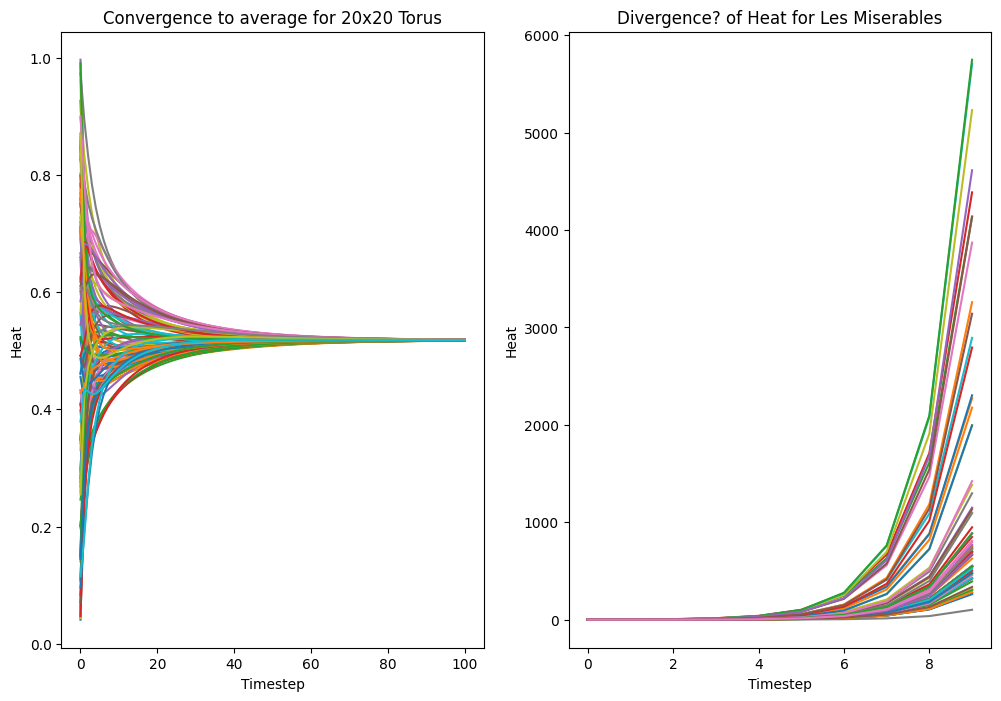

In [8]:
plt.subplots(1, 2, figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(x[:, :, 0])
plt.title("Convergence to average for 20x20 Torus")
plt.xlabel("Timestep")
plt.ylabel("Heat")

plt.subplot(1, 2, 2)
plt.plot(x1[:10, :, 0])
plt.title("Divergence? of Heat for Les Miserables")
plt.xlabel("Timestep")
plt.ylabel("Heat")

In [10]:
def get_color_array(x: np.ndarray) -> np.ndarray:
    """
    Calculates the coloring for each node for all iterations. 
    This is assuming our graph is the torus, so each node has degree 4
    
    Parameters
    ----------
    x: np.ndarray
        The array of size T x n. Only give it one set of initial conditions 
    
    Returns
    -------
    colors: np.ndarray
        The color array for each iteration and node given in rgba
    """
    #Taking the last iteration to be roughly equal to xbar to avoid 
    #    recalcualting it
    #    Contribution of each node to the Dirichelt energy at iteration
    con = []
    for iterate in x[:, :]:
        con.append(2*(iterate - x[-1, 0])**2)

    #normalizing to max contribution
    i = 0
    for iterate in con:
        maxcon = max(iterate)
        iterate /= maxcon
        con[i] = iterate
        i+=1

    colors = []
    for iterate in con:
        temp = []
        for val in iterate:
            temp.append(cm.hot(min(val**0.5, 0.9)))
        colors.append(temp)
        
    return colors

def get_nodesize(x: np.array, scale: float) -> np.array:
    """
    Simple function to calcualte the size of each node
    
    Paramters
    ---------
    x: np.array
        The nodes and their values
    scale: float
        Adjustable scaling for node sizes
    
    Returns
    -------
    The scaled nodes
    """
    return scale*x

def get_linewidth(y: np.array, scale: float) -> np.array:
    """
    Simple function to calcualte the size of each node
    
    Paramters
    ---------
    y: np.array
        The edges and their values
    scale: float
        Adjustable scaling for line width
    
    Returns
    -------
    The scaled edges
    """
    linewidth = []
    for val in y:
        linewidth.append(scale*abs(val))
        
    return linewidth

<IPython.core.display.Javascript object>


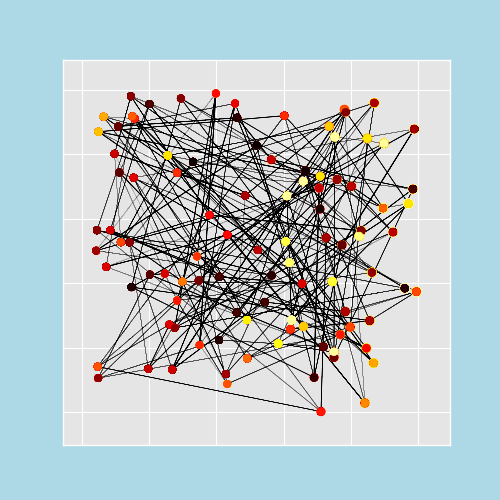

In [11]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook

pos = {v: x01[i] for i, v in enumerate(T.nodes)}
fig = plt.figure()
fig.set_size_inches((5.0, 5.0))
plt.style.use('ggplot')
fig.set_facecolor('lightblue')
color_arr = get_color_array(x[:, :, 0])

def animate(frame):
    node_collection = nx.draw_networkx_nodes(T, pos = pos, node_size=get_nodesize(x[frame, :, 0], 50), node_color=color_arr[frame])
    edge_collection = nx.draw_networkx_edges(T, pos=pos, width = get_linewidth(y[frame, :, 0], 2))
    
    return node_collection, edge_collection

t, n, d = x.shape

ani = FuncAnimation(fig, func=animate , frames=t, interval=40, repeat=True, repeat_delay=1500)
plt.show()

I couldn't get the positions of the nodes to move by frame, the above animation is my best shot at the heat convergence on the Torus graph. I will provide my $\textit{almost}$ correct plotting of the graph and its convergence.

<IPython.core.display.Javascript object>


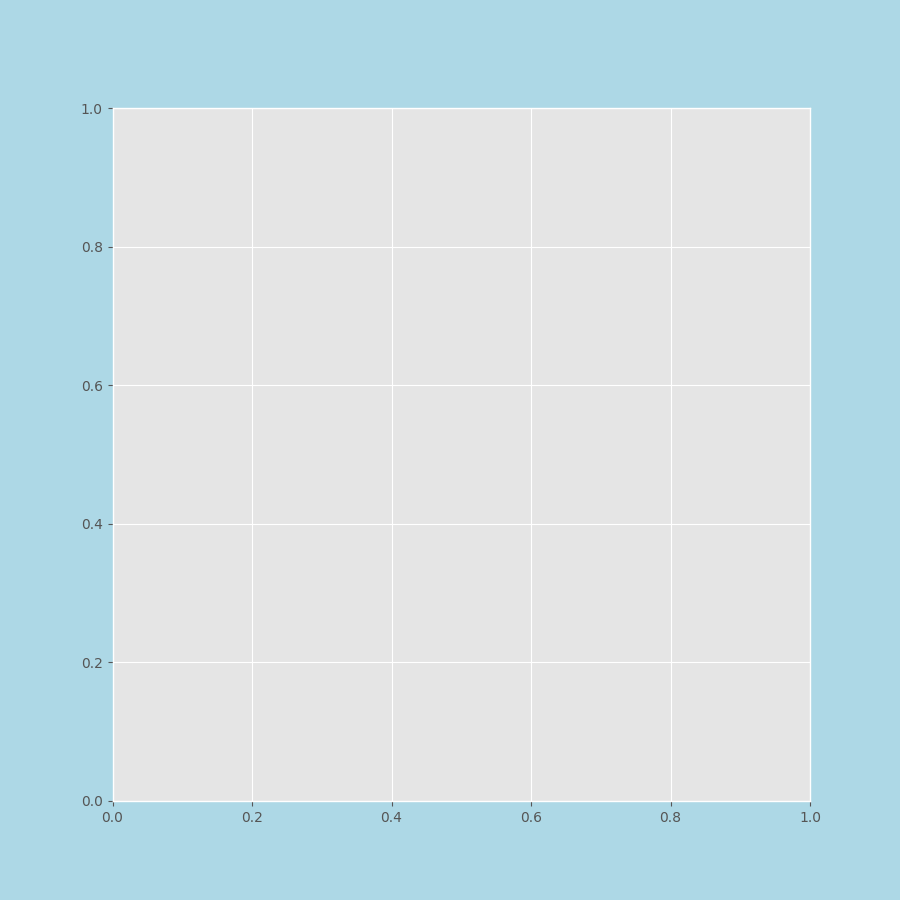

In [22]:
def create_animation(T: nx.Graph, x: np.ndarray, y: np.ndarray, t: int, i: int):
    """
    Unfortunately comes up short of creating the animation. I'm honestly not sure why I can't get it to work.
    
    Parameters
    ----------
    T :nx.Graph
        The graph provided
    
    x: np.ndarray
        The T x n x d array for which stores T iterations of heat flow on n nodes 
        run on d inital conditions.
        
    y: np.ndarray
        The T x n x d array which holds the energy flow along each edge 
    
    t: int
        The total frames for the animation. 
        Should also be the same number of iterations of the heat diffusion
    
    i: int
        The inital condition index in x
    """
    fig, ax = plt.subplots(figsize=(9, 9))
    plt.style.use('ggplot')
    fig.set_facecolor('lightblue')
    color_arr = get_color_array(x[:, :, i])
    pos = {v: x[0, j, i] for j, v in enumerate(T.nodes)}


    def animate(frame, i, x, y, color_arr):
        pos = {v: x[frame, j, i] for j, v in enumerate(T.nodes)}
        node_collection = ax.draw_networkx_nodes(T, pos=pos, node_size=get_nodesize(x[frame, :, i], 50), node_color=color_arr[frame])
        edge_collection = ax.draw_networkx_edges(T, pos=pos, width=get_linewidth(y[frame, :, i], 2))

        
        return node_collection, edge_collection


    ani = FuncAnimation(fig, func=animate, fargs = (i, x, y, color_arr), frames=t, interval=t, repeat=True)

    plt.show()
    
    return ani

t, n, d = x.shape   

ani = create_animation(T, x ,y, t, 0)

## Spectral Clustering

So far we have seen `networkx` use the `spring_layout`. The library also offers `spectral_layout`. Run heat diffusion on the torus you created and visually compare the final positions with the spectral layout. How are they different?

In [20]:
nx.draw(T, pos=nx.spectral_layout(T))

I would imagine we would see node values whihc would be guided by $\lambda_2$ in this. Since I couldn't get the positions to move correctly, I will have to skip this one, unfortunately.